In [18]:
import pandas as pd

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual path or name of your file
file_path = 'AAPL_historical_data.csv'
df = pd.read_csv(file_path)

# Step 2: Display dataset information
print("First few rows of the dataset:")
print(df.head())  # Display the first 5 rows

print("\nDataset Information:")
print(df.info())  # Display the structure and non-null count of each column

print("\nSummary Statistics of Numerical Columns:")
print(df.describe())  # Display statistical summary of numeric columns


First few rows of the dataset:
                        Date      Open      High       Low     Close
0  1980-12-12 00:00:00-05:00  0.098834  0.099264  0.098834  0.098834
1  1980-12-15 00:00:00-05:00  0.094108  0.094108  0.093678  0.093678
2  1980-12-16 00:00:00-05:00  0.087232  0.087232  0.086802  0.086802
3  1980-12-17 00:00:00-05:00  0.088951  0.089381  0.088951  0.088951
4  1980-12-18 00:00:00-05:00  0.091530  0.091959  0.091530  0.091530

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11094 non-null  object 
 1   Open    11094 non-null  float64
 2   High    11094 non-null  float64
 3   Low     11094 non-null  float64
 4   Close   11094 non-null  float64
dtypes: float64(4), object(1)
memory usage: 433.5+ KB
None

Summary Statistics of Numerical Columns:
               Open          High           Low         Close
cou

In [19]:
# Step 2: Data Cleaning and Preparation

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Drop rows with missing values if necessary
df = df.dropna()

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Verify the cleaned dataset
print("\nFirst few rows after cleaning:")
print(df.head())

print("\nDataset Information After Cleaning:")
print(df.info())



Missing values in each column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

First few rows after cleaning:
                               Open      High       Low     Close
Date                                                             
1980-12-12 00:00:00-05:00  0.098834  0.099264  0.098834  0.098834
1980-12-15 00:00:00-05:00  0.094108  0.094108  0.093678  0.093678
1980-12-16 00:00:00-05:00  0.087232  0.087232  0.086802  0.086802
1980-12-17 00:00:00-05:00  0.088951  0.089381  0.088951  0.088951
1980-12-18 00:00:00-05:00  0.091530  0.091959  0.091530  0.091530

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 11094 entries, 1980-12-12 00:00:00-05:00 to 2024-12-13 00:00:00-05:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    11094 non-null  float64
 1   High    11094 non-null  float64
 2   Low     11094 non-null  float64
 3   Close   11094 non-null  float64


<ipython-input-19-4c121acb0f5f>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


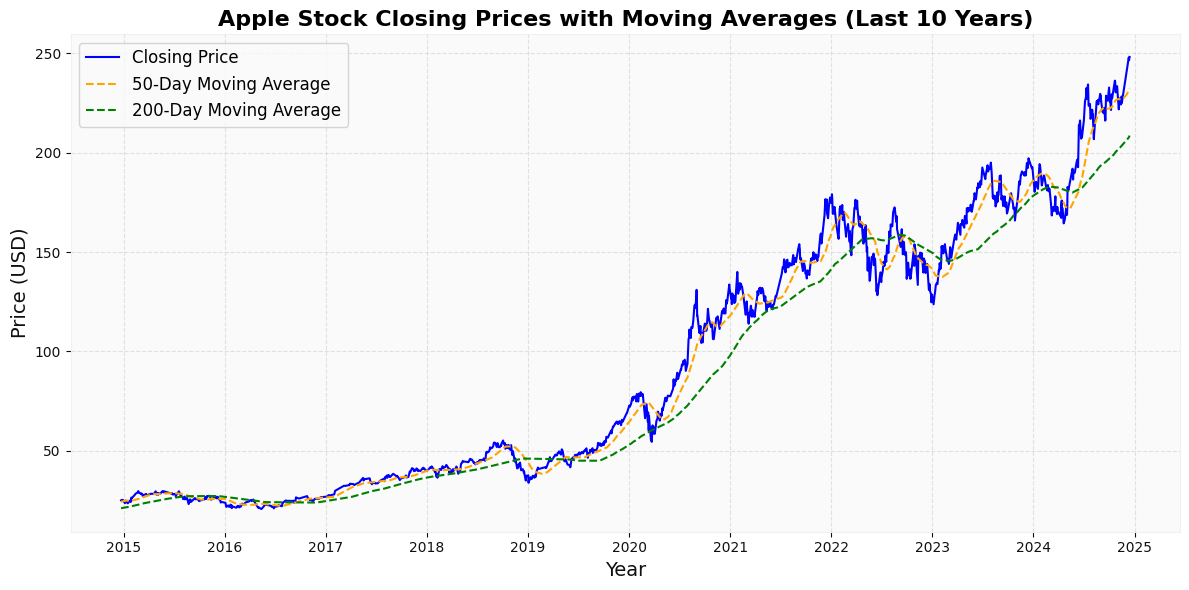

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_data(data):
    """
    Preprocess the stock data: calculate moving averages and clean the data.

    Parameters:
        data (DataFrame): The raw stock data.

    Returns:
        DataFrame: The preprocessed data with moving averages.
    """
    # Calculate moving averages
    data['50_Day_MA'] = data['Close'].rolling(window=50).mean()
    data['200_Day_MA'] = data['Close'].rolling(window=200).mean()
    return data

def plot_last_10_years(data):
    """
    Plot the last 10 years of Apple's stock data with moving averages.

    Parameters:
        data (DataFrame): The stock data with Date, Close, and moving averages.
    """
    # Filter for the last 10 years
    last_10_years = data[data.index >= pd.Timestamp.now().tz_localize(None) - pd.DateOffset(years=10)]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(last_10_years.index, last_10_years['Close'], label='Closing Price', color='blue')
    plt.plot(last_10_years.index, last_10_years['50_Day_MA'], label='50-Day Moving Average', linestyle='--', color='orange')
    plt.plot(last_10_years.index, last_10_years['200_Day_MA'], label='200-Day Moving Average', linestyle='--', color='green')

    plt.title("Apple Stock Closing Prices with Moving Averages (Last 10 Years)", fontsize=16, weight='bold')
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Price (USD)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Load the data
df = pd.read_csv("AAPL_historical_data.csv", parse_dates=['Date'], index_col='Date')

# Ensure the 'Date' column is the index and is timezone-naive
df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)

# Preprocess the data (calculate moving averages)
df = preprocess_data(df)

# Plot the last 10 years
plot_last_10_years(df)


<ipython-input-27-88923bc272a2>:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  average_by_year = df['Close'].resample('Y').mean()


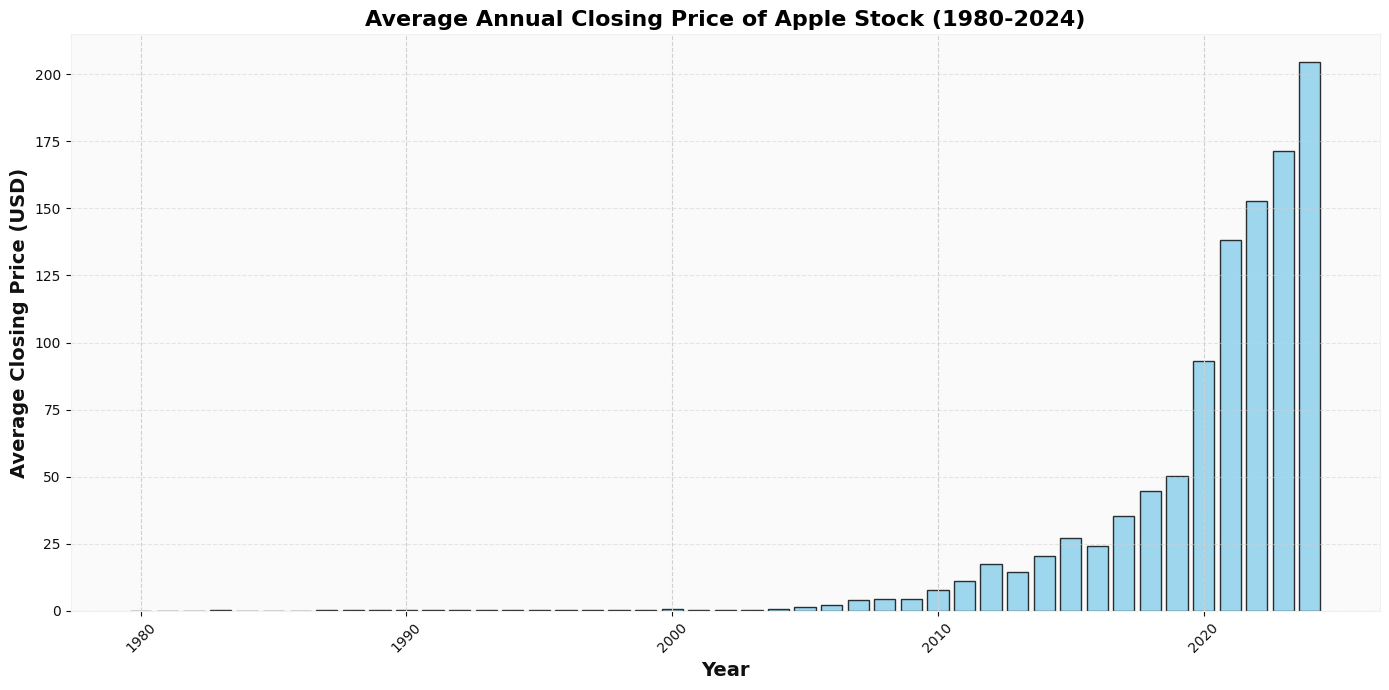

In [27]:
import matplotlib.pyplot as plt

def plot_average_closing_price_by_year(df):
    """
    Plot a bar chart showing the average closing price of the stock by year.

    Parameters:
    df (DataFrame): The stock data with a 'Close' column.

    Returns:
    None
    """
    # Ensure the Date column is the index and convert it to datetime if not already
    df.index = pd.to_datetime(df.index)

    # Group data by year and calculate the average closing price
    average_by_year = df['Close'].resample('Y').mean()

    # Plot the bar chart
    plt.figure(figsize=(14, 7))
    average_by_year.index = average_by_year.index.year  # Convert datetime to year for labeling
    plt.bar(average_by_year.index, average_by_year, color='skyblue', edgecolor='black', alpha=0.8)

    # Customize the plot
    plt.title('Average Annual Closing Price of Apple Stock (1980-2024)', fontsize=16, weight='bold')
    plt.xlabel('Year', fontsize=14, weight='bold')
    plt.ylabel('Average Closing Price (USD)', fontsize=14, weight='bold')
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function to create the bar chart
plot_average_closing_price_by_year(df)


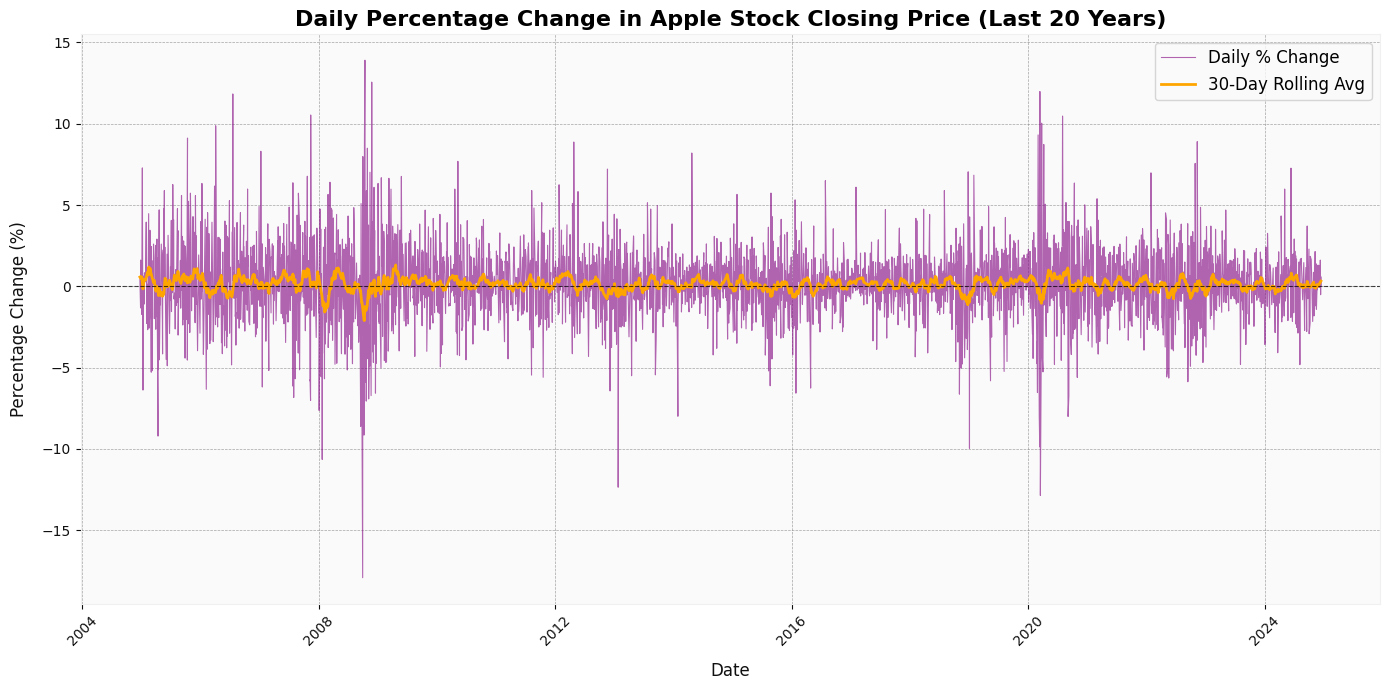

In [28]:
def plot_refined_percentage_change(data):
    """
    Plot a refined daily percentage change chart focusing on trends.

    Parameters:
        data (DataFrame): The stock data containing 'Close' column.
    """
    # Calculate daily percentage change
    data['Pct_Change'] = data['Close'].pct_change() * 100

    # Smoothing with a 30-day rolling average
    data['Pct_Change_Smooth'] = data['Pct_Change'].rolling(window=30).mean()

    # Filter for the last 20 years
    data_last_20_years = data.loc[data.index >= pd.Timestamp.now() - pd.DateOffset(years=20)]

    # Plot the percentage change
    plt.figure(figsize=(14, 7))
    plt.plot(data_last_20_years.index, data_last_20_years['Pct_Change'], label='Daily % Change', color='purple', alpha=0.6, linewidth=0.8)
    plt.plot(data_last_20_years.index, data_last_20_years['Pct_Change_Smooth'], label='30-Day Rolling Avg', color='orange', linewidth=2)

    # Title and labels
    plt.title("Daily Percentage Change in Apple Stock Closing Price (Last 20 Years)", fontsize=16, fontweight='bold')
    plt.xlabel("Date", fontsize=12, labelpad=10)
    plt.ylabel("Percentage Change (%)", fontsize=12, labelpad=10)

    # Highlighting thresholds
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)

    # Customizing ticks
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)

    # Grid and legend
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with the refined plot
plot_refined_percentage_change(df)
